In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# EDA and Data Preparation

In [71]:
data = pd.read_csv("/Users/daniyahammarah/Downloads/DSMP/fake_transactional_data_24.csv")

In [72]:
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025


#### Renaming columns

In [73]:
data.rename(columns = {'from_totally_fake_account':'Sender_Account_Num', 'monopoly_money_amount':'Amount', 
                              'to_randomly_generated_account':'Receiver', 'not_happened_yet_date':'Transaction_date'}, inplace = True)


#### Converting Date col to Date Type

In [74]:
data["Transaction_date"] = pd.to_datetime(data.Transaction_date,format="%d/%m/%Y")
data["Transaction_Date"] = data['Transaction_date'].dt.strftime('%m/%d/%Y')
print(data['Transaction_date'])

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: Transaction_date, Length: 10148280, dtype: datetime64[ns]


In [75]:
data['Day_of_Week'] = data['Transaction_date'].dt.dayofweek
data['Month'] = data['Transaction_date'].dt.strftime('%B')
data['Week_of_Month'] = data['Transaction_date'].dt.day // 7 + 1
data


,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month
0,10371.0,4.00,CINEMA,2025-01-01,01/01/2025,2,January,1
1,88339.0,2.40,40544,2025-01-01,01/01/2025,2,January,1
2,18555.0,2.40,85149,2025-01-01,01/01/2025,2,January,1
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1
4,80792.0,1.95,18555,2025-01-01,01/01/2025,2,January,1
...,...,...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5
10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5
10148277,57569.0,14.00,WINE_BAR,2025-12-31,12/31/2025,2,December,5
10148278,1490.0,9.00,57569,2025-12-31,12/31/2025,2,December,5


#### Sender Accnt No. in INTEGER and extracting length of account number.

In [77]:
data['Sender_Account_Num'] = data['Sender_Account_Num'].astype(int)

data['Sender_Account_Num_Length'] = data['Sender_Account_Num'].astype(str).apply(lambda x: len(x))

unique_lengths = data['Sender_Account_Num_Length'].unique()
print(unique_lengths)

[5 4 6]


In [213]:
data['Receiver_Account_Num'] = data['Receiver_Account_Num'].astype(int)

data['Receiver_Account_Num_Length'] = data['Receiver_Account_Num'].astype(str).apply(lambda x: len(x))

unique_lengths = data['Receiver_Account_Num_Length'].unique()
print(unique_lengths)

[1 5 4 6]


#### Receiver Accnt No. in INTEGER and extracting business names into new column.

In [79]:
data['Receiver_Account_Num'] = pd.to_numeric(data['Receiver'], errors='coerce')
mask = data['Receiver_Account_Num'].isna()
data.loc[mask, 'Receiver_Name'] = data.loc[mask, 'Receiver']

data['Receiver_Account_Num'] = data['Receiver_Account_Num'].fillna(0)

data['Receiver_Account_Num'] = data['Receiver_Account_Num'].astype(int)

data['Receiver_Account_Num_Length'] = data['Receiver_Account_Num'].astype(str).apply(lambda x: len(x))
data['Receiver_Name'] = data['Receiver_Name'].astype(str)

In [81]:
receiver_names = data['Receiver_Name'].drop_duplicates()
receiver_names.to_csv('receiver_names.csv', index=False)

receiver_nums = data['Receiver_Account_Num'].drop_duplicates()
receiver_nums.to_csv('receiver_nums.csv', index=False)

#### Data Type

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 12 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Sender_Account_Num           int64         
 1   Amount                       float64       
 2   Receiver                     object        
 3   Transaction_date             datetime64[ns]
 4   Transaction_Date             object        
 5   Day_of_Week                  int32         
 6   Month                        object        
 7   Week_of_Month                int64         
 8   Sender_Account_Num_Length    int64         
 9   Receiver_Account_Num         int64         
 10  Receiver_Name                object        
 11  Receiver_Account_Num_Length  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 890.4+ MB


#### Unique values 

In [83]:
data.nunique()

Sender_Account_Num              8142
Amount                          5236
Receiver                       14300
Transaction_date                 364
Transaction_Date                 364
Day_of_Week                        7
Month                             12
Week_of_Month                      5
Sender_Account_Num_Length          3
Receiver_Account_Num           14222
Receiver_Name                     80
Receiver_Account_Num_Length        4
dtype: int64

In [84]:
data.shape[0]

10148280

#### Nulls

In [85]:
data.isnull().sum()

Sender_Account_Num             0
Amount                         0
Receiver                       0
Transaction_date               0
Transaction_Date               0
Day_of_Week                    0
Month                          0
Week_of_Month                  0
Sender_Account_Num_Length      0
Receiver_Account_Num           0
Receiver_Name                  0
Receiver_Account_Num_Length    0
dtype: int64

#### Data Stats

In [86]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Sender_Account_Num,10148280.0,50805.021701,1000.0,25304.0,50781.0,75633.0,100988.0,28937.100678
Amount,10148280.0,18.393485,1.45,2.65,6.0,12.0,1995.0,86.123232
Transaction_date,10148280,2025-07-02 20:10:40.958271744,2025-01-01 00:00:00,2025-04-02 00:00:00,2025-07-03 00:00:00,2025-10-04 00:00:00,2025-12-31 00:00:00,NaN
Day_of_Week,10148280.0,3.728669,0.0,2.0,4.0,5.0,6.0,1.897975
Week_of_Month,10148280.0,2.818001,1.0,2.0,3.0,4.0,5.0,1.291484
Sender_Account_Num_Length,10148280.0,4.920373,4.0,5.0,5.0,5.0,6.0,0.309151
Receiver_Account_Num,10148280.0,12785.606255,0.0,0.0,0.0,0.0,100988.0,26433.992868
Receiver_Account_Num_Length,10148280.0,1.979424,1.0,1.0,1.0,1.0,6.0,1.705149


#### checking the effect of dropping duplicates

In [87]:
data_drop = data.drop_duplicates() #cant drop duplicates, the dates are not timestamped
data_drop.shape[0]

8482106

#### marking duplicate rows

In [89]:
data['is_duplicate'] = data.duplicated(subset=['Sender_Account_Num', 'Receiver_Account_Num', 'Receiver_Name', 'Transaction_Date', 'Amount'], keep=False)

data_check = data
data_check.to_csv('data_check.csv', index=False)


#### checking if all receivers are also senders

In [92]:
unique_senders = set(data['Sender_Account_Num'])
unique_receivers = set(data['Receiver_Account_Num'])

common_account_numbers = unique_senders.intersection(unique_receivers)

num_common_account_numbers = len(common_account_numbers)

print("Number of sender account numbers also present as receiver account numbers:", num_common_account_numbers)

Number of sender account numbers also present as receiver account numbers: 8127


#### Extracting Receiver Account NAMES

In [94]:
receiver_names = data[data['Receiver'].str.isalpha()]['Receiver_Account_Num'].drop_duplicates()
# receiver_names = receiver_names[['Receiver_Account_Num']].drop_duplicates()

receiver_names.to_csv('receiver_names.csv', index=False)

In [95]:
receiver_nums = data[['Receiver_Account_Num']].drop_duplicates()

receiver_nums

receiver_nums.to_csv('receiver_num.csv', index=False)

#### Min date

In [96]:
min_date = data['Transaction_date'].min()
min_date

Timestamp('2025-01-01 00:00:00')

#### Max date

In [97]:
max_date = data['Transaction_date'].max()
max_date

Timestamp('2025-12-31 00:00:00')

#### Missing dates

In [98]:
date_range = pd.date_range(start=min_date, end=max_date)
missing_dates = date_range[~date_range.isin(data['Transaction_date'])]
missing_dates

DatetimeIndex(['2025-08-22'], dtype='datetime64[ns]', freq='D')

#### Extracting month and year

In [99]:
data['Transaction_Month'] = data['Transaction_date'].dt.month
data['Transaction_Year'] = data['Transaction_date'].dt.year
data

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,Receiver_Name,Receiver_Account_Num_Length,is_duplicate,Transaction_Month,Transaction_Year
0,10371,4.00,CINEMA,2025-01-01,01/01/2025,2,January,1,5,0,CINEMA,1,False,1,2025
1,88339,2.40,40544,2025-01-01,01/01/2025,2,January,1,5,40544,nan,5,False,1,2025
2,18555,2.40,85149,2025-01-01,01/01/2025,2,January,1,5,85149,nan,5,False,1,2025
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,5,0,HIPSTER_COFFEE_SHOP,1,False,1,2025
4,80792,1.95,18555,2025-01-01,01/01/2025,2,January,1,5,18555,nan,5,False,1,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148275,32185,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5,5,0,COFFEE_SHOP,1,False,12,2025
10148276,32185,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5,5,0,COFFEE_SHOP,1,False,12,2025
10148277,57569,14.00,WINE_BAR,2025-12-31,12/31/2025,2,December,5,5,0,WINE_BAR,1,False,12,2025
10148278,1490,9.00,57569,2025-12-31,12/31/2025,2,December,5,4,57569,nan,5,False,12,2025


# TRANSACTION PATTERN ANALYSIS

In [100]:
import pandas as pd
from datetime import datetime

# Dictionary mapping
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Mapping integer representation to day names
data['Day_of_Week'] = data['Day_of_Week'].map(day_mapping)

In [101]:
data

day = data['Day_of_Week'].unique()
print(day)

['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday']


In [102]:
# Transaction patterns by day of the week
day_of_week_patterns = data.groupby('Day_of_Week')['Amount'].agg(['count', 'sum', 'mean'])
print("Transaction patterns by day of the week:")
print(day_of_week_patterns)



Transaction patterns by day of the week:
               count          sum       mean
Day_of_Week                                 
Friday       2402198  35694018.95  14.858900
Monday        895964  19916790.94  22.229454
Saturday     2080948  35571394.97  17.093841
Sunday       2073671  35553515.30  17.145205
Thursday      888190  19843699.49  22.341728
Tuesday       895174  19979303.02  22.318905
Wednesday     912135  20103512.82  22.040063


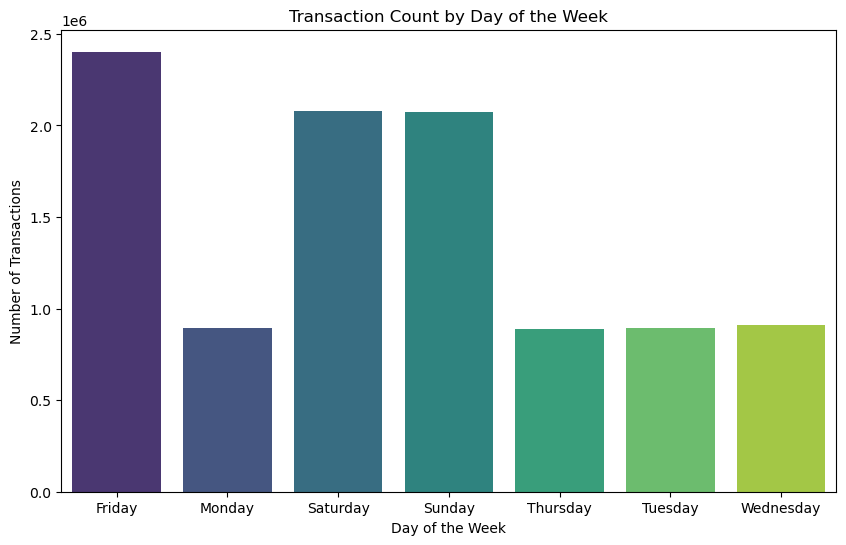

In [103]:
# Visualize transaction patterns by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_patterns.index, y='count', data=day_of_week_patterns, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Transaction Count by Day of the Week')
plt.show()

In [104]:
# Transaction patterns by month
month_patterns = data.groupby('Month')['Amount'].agg(['count', 'sum', 'mean'])
print("\nTransaction patterns by month:")
print(month_patterns)




Transaction patterns by month:
            count          sum       mean
Month                                    
April      812316  14981481.00  18.442922
August     856063  15391387.82  17.979270
December   911468  18256984.89  20.030308
February   776515  14645381.97  18.860398
January    854543  15356512.85  17.970439
July       828389  15181448.00  18.326472
June       832451  15252728.86  18.322675
March      871002  15746678.39  18.078809
May        881706  15835541.72  17.960116
November   854100  15538928.68  18.193336
October    858586  15514159.54  18.069430
September  811141  14961001.77  18.444391


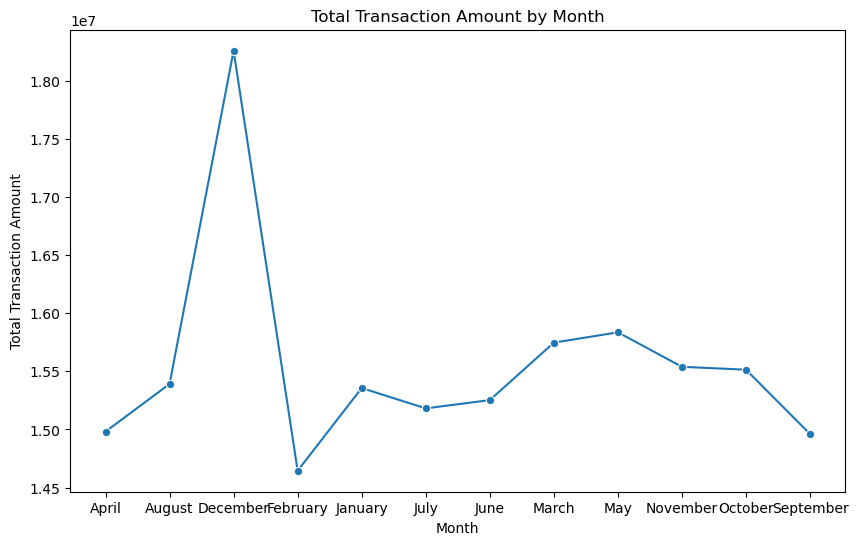

In [105]:
# Visualize transaction patterns by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_patterns.index, y='sum', data=month_patterns, marker='o', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Month')
plt.show()

In [106]:
# Transaction patterns by week of the month
week_of_month_patterns = data.groupby('Week_of_Month')['Amount'].agg(['count', 'sum', 'mean'])
print("\nTransaction patterns by week of the month:")
print(week_of_month_patterns)




Transaction patterns by week of the month:
                 count          sum       mean
Week_of_Month                                 
1              2020533  37957639.10  18.785954
2              2356529  44832046.14  19.024610
3              2357358  45114969.99  19.137937
4              2277104  43087690.60  18.922144
5              1136756  15669889.66  13.784743


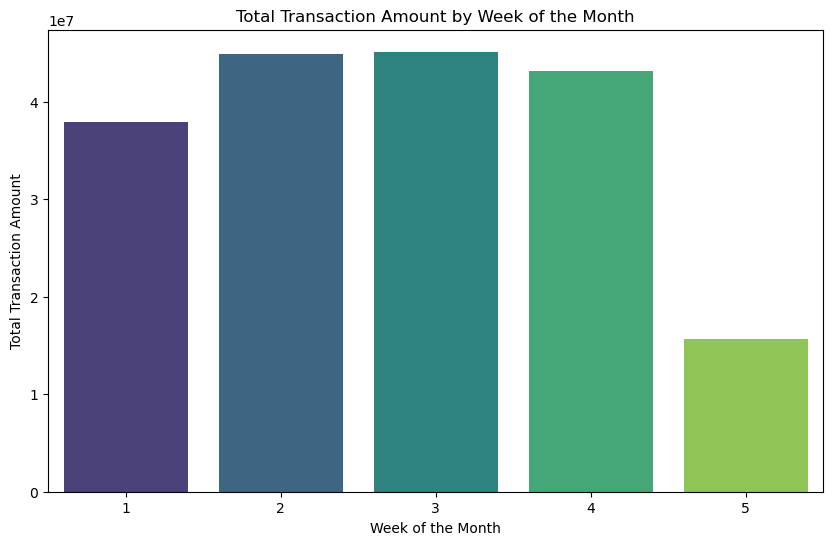

In [107]:
# Visualize transaction patterns by week of the month
plt.figure(figsize=(10, 6))
sns.barplot(x=week_of_month_patterns.index, y='sum', data=week_of_month_patterns, palette='viridis')
plt.xlabel('Week of the Month')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Week of the Month')
plt.show()

In [108]:
# Transaction patterns by sender-receiver account pairs
account_pairs = data[['Sender_Account_Num', 'Receiver']].apply(tuple, axis=1)
account_pair_patterns = data.groupby(account_pairs)['Amount'].agg(['count', 'sum', 'mean'])
print("\nTransaction patterns by sender-receiver account pairs:")
print(account_pair_patterns.head())



Transaction patterns by sender-receiver account pairs:
               count      sum         mean
(1000, 16354)     55    315.4     5.734545
(1000, 18013)     14     86.5     6.178571
(1000, 30208)      6     35.0     5.833333
(1000, 31489)     12  16130.0  1344.166667
(1000, 36647)      1      5.0     5.000000


In [109]:
# Transaction amount distribution
print("\nTransaction amount distribution:")
print(data['Amount'].describe())


Transaction amount distribution:
count    1.014828e+07
mean     1.839348e+01
std      8.612323e+01
min      1.450000e+00
25%      2.650000e+00
50%      6.000000e+00
75%      1.200000e+01
max      1.995000e+03
Name: Amount, dtype: float64


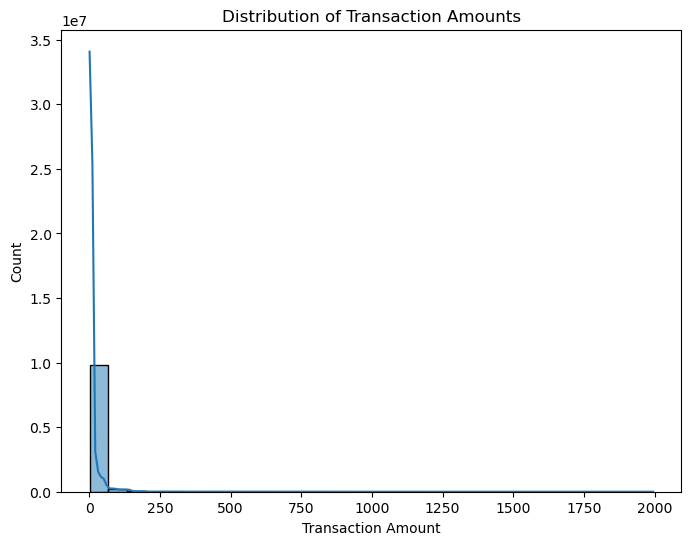

In [110]:
# Visualize transaction amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], kde=True, bins=30)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

#### SEPARATE INFLOW, OUTFLOW TABLES FOR ACCOUNTS AND BUSINESSES

In [184]:
inflow_account = data[[ 'Transaction_date', 'Receiver_Account_Num','Amount']]
inflow_account = inflow_account[inflow_account['Receiver_Account_Num'] != 0]

inflow_business = data[[ 'Transaction_date', 'Receiver_Name','Amount']]
inflow_business = inflow_business.dropna(subset=['Receiver_Name'])

outflow = data[[ 'Transaction_date', 'Sender_Account_Num','Amount']]

# CUSTOMER SEGMENTATION - RFM

In [111]:
# import pandas as pd

# # January 1, 2026, as the current date for calculating Recency
# current_date = pd.Timestamp('2026-01-01')

# # Group by 'Sender_Account_Num' and find the maximum transaction date for each sender
# max_transaction_dates = data.groupby('Sender_Account_Num')['Transaction_date'].max().reset_index()

# # Calculate Recency for each sender
# max_transaction_dates['Recency'] = (current_date - max_transaction_dates['Transaction_date']).dt.days

# # Calculate Frequency
# frequency_data = data.groupby('Sender_Account_Num')['Transaction_date'].count().reset_index()
# frequency_data.columns = ['Sender_Account_Num', 'Frequency']

# # Calculate Monetary
# monetary_data = data.groupby('Sender_Account_Num')['Amount'].sum().reset_index()
# monetary_data.columns = ['Sender_Account_Num', 'Monetary']

# # Merge Recency, Frequency, and Monetary data into a single DataFrame
# rfm_data = pd.merge(max_transaction_dates[['Sender_Account_Num', 'Recency']], frequency_data, on='Sender_Account_Num')
# rfm_data = pd.merge(rfm_data, monetary_data, on='Sender_Account_Num')

# print("RFM Data:")
# print(rfm_data)



RFM Data:
      Sender_Account_Num  Recency  Frequency  Monetary
0                   1000        1       1710  28698.51
1                   1002        1       1043  15622.97
2                   1006        1       1841  18778.19
3                   1018        2        805  15612.21
4                   1053        1       1319  19444.57
...                  ...      ...        ...       ...
8137              100931        1       1664  22332.81
8138              100934        2       1111  18579.25
8139              100947        1       1586  20783.20
8140              100986        1       1034  15314.23
8141              100988        1       1351  19714.77

[8142 rows x 4 columns]


In [112]:
# # Calculate RFM scores
# rfm_data['R_score'] = pd.qcut(rfm_data['Recency'], q=3, labels=False, duplicates='drop') + 1
# rfm_data['F_score'] = pd.qcut(rfm_data['Frequency'], q=3, labels=False, duplicates='drop') + 1
# rfm_data['M_score'] = pd.qcut(rfm_data['Monetary'], q=3, labels=False, duplicates='drop') + 1

# # Combine RFM scores into RFM score
# rfm_data['RFM_score'] = rfm_data['R_score'] * 100 + rfm_data['F_score'] * 10 + rfm_data['M_score']


# # # Assuming entire available data period as the time period
# # time_period = 1  # Simplified assumption of 1 time period
# # ltv = total_revenue * retention_rate / time_period

In [113]:
# rfm_data['Recency'].unique()

array([1, 2, 5, 3, 4])

In [114]:
# # Define customer segmentation based on RFM and LTV
# def segment_customers(row):
#     if row['RFM_score'] >= 142:
#         return 'High Value'
#     elif row['RFM_score'] >= 133:
#         return 'Medium Value'
#     else:
#         return 'Low Value'


In [115]:
# # Apply segmentation function to create a new column 'Segment'
# result_df['Segment'] = result_df.apply(segment_customers, axis=1)

# # Display the DataFrame with RFM scores, LTV, and segmentation
# result_df

In [116]:
# print(result_df['RFM_score'].unique())

In [117]:
# # Define thresholds for each RFM component
# recency_thresholds = {'high': range(1, 3), 'mid': range(3, 5), 'low': range(5, 9)}
# frequency_thresholds = {'high': range(4, 5), 'mid': range(2, 4), 'low': range(1, 2)}
# monetary_thresholds = {'high': range(4, 5), 'mid': range(2, 4), 'low': range(1, 2)}

# # Define function to categorize RFM scores into segments
# def categorize_rfm(recency, frequency, monetary):
#     recency_segment = next(segment for segment, threshold_range in recency_thresholds.items() if recency in threshold_range)
#     frequency_segment = next(segment for segment, threshold_range in frequency_thresholds.items() if frequency in threshold_range)
#     monetary_segment = next(segment for segment, threshold_range in monetary_thresholds.items() if monetary in threshold_range)
#     return f"{recency_segment}-{frequency_segment}-{monetary_segment}"

# # Example RFM scores
# rfm_scores = ['111', '112', '113', '114', '121', '122', '123', '124', '131', '132', '133', '134', '141', '142', '143', '144']

# # Categorize RFM scores into segments
# segmented_customers = {rfm_score: categorize_rfm(int(rfm_score[0]), int(rfm_score[1]), int(rfm_score[2])) for rfm_score in rfm_scores}

# # Print segmented customers
# for rfm_score, segment in segmented_customers.items():
#     print(f"RFM Score: {rfm_score} -> Segment: {segment}")


In [118]:
# print(result_df['Segment'].unique())

In [119]:
# total_unique_senders = data['Sender_Account_Num'].nunique()

# print("Total unique sender accounts:", total_unique_senders)

In [120]:
# sender_counts_by_segment = result_df.groupby('Segment')['Sender_Account_Num'].nunique()

# print("Number of sender accounts in each segment:")
# print(sender_counts_by_segment)

In [121]:
# result_df

# k means on rfm

In [122]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Select features for segmentation (Recency, Frequency, Monetary)
# rfm_data_subset = rfm_data[['Recency', 'Frequency', 'Monetary']]

# # Standardize the data
# rfm_data_scaled = (rfm_data_subset - rfm_data_subset.mean()) / rfm_data_subset.std()

# # Determine the optimal number of clusters using the elbow method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(rfm_data_scaled)
#     wcss.append(kmeans.inertia_)

# # Plot the elbow method graph
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()


In [123]:
# # Based on the elbow method, choose the number of clusters (e.g., 3)
# n_clusters = 3

# # Perform k-means clustering
# kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
# rfm_data['Segment'] = kmeans.fit_predict(rfm_data_scaled)

# # Visualize the clusters
# fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
#     ax[i].scatter(rfm_data[feature], rfm_data['Segment'], c=rfm_data['Segment'], cmap='viridis', alpha=0.7)
#     ax[i].set_xlabel(feature)
#     ax[i].set_ylabel('Segment')
#     ax[i].set_title(f'Segmentation based on {feature}')
# plt.tight_layout()
# plt.show()

In [124]:
# sender_counts_by_segment = rfm_data.groupby('Segment')['Sender_Account_Num'].nunique()

# print("Number of sender accounts in each segment:")
# print(sender_counts_by_segment)

In [125]:
# rfm_data

In [126]:
# recencycount = rfm_data['Recency'].value_counts().sort_index()

# # Print the result
# print(recencycount)

In [127]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Data preprocessing
# # Handle missing values, encode categorical variables, etc.

# # RFM Feature Engineering
# recency = pd.to_datetime(data['Transaction_date']).max() - pd.to_datetime(data['Transaction_date'])
# frequency = data.groupby('Sender_Account_Num').size()
# monetary = data.groupby('Sender_Account_Num')['Amount'].sum()

# # Combine RFM features
# rfm_df = pd.DataFrame({
#     'Recency': recency,
#     'Frequency': frequency,
#     'Monetary': monetary
# })

# # Scale the features
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm_df)

# # K-means Clustering
# # Determine optimal k
# # Apply k-means
# kmeans = KMeans(n_clusters=3, random_state=42)
# data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# # Interpretation
# cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# cluster_df = pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary'])
# print(cluster_df)


In [128]:
# import pandas as pd

# # Assuming your DataFrame is named 'data'

# # Sort the DataFrame by 'Sender_Account_Num' and 'Transaction_date' to ensure transactions are ordered properly
# data.sort_values(by=['Sender_Account_Num', 'Transaction_date'], inplace=True)

# # Calculate the time difference between consecutive transactions for each sender
# data['Days_Between_Transactions'] = data.groupby('Sender_Account_Num')['Transaction_date'].diff().dt.days

# # Calculate the average number of days between two transactions for each sender
# average_days_between_transactions = data.groupby('Sender_Account_Num')['Days_Between_Transactions'].mean()

# # Calculate frequency (number of transactions) for each sender
# frequency = data.groupby('Sender_Account_Num').size()

# # Calculate monetary value (total amount spent) for each sender
# monetary_value = data.groupby('Sender_Account_Num')['Amount'].sum()

# # Combine the calculated metrics into a DataFrame
# rfm_data = pd.DataFrame({
#     'Average_Days_Between_Transactions': average_days_between_transactions,
#     'Frequency': frequency,
#     'Monetary_Value': monetary_value
# })

# # Assign scores for recency, frequency, and monetary value (you can customize this part based on quartiles or thresholds)
# rfm_data['Recency_Score'] = pd.qcut(rfm_data['Average_Days_Between_Transactions'], q=4, labels=False, duplicates='drop') + 1
# rfm_data['Frequency_Score'] = pd.qcut(rfm_data['Frequency'], q=4, labels=False, duplicates='drop') + 1
# rfm_data['Monetary_Value_Score'] = pd.qcut(rfm_data['Monetary_Value'], q=4, labels=False, duplicates='drop') + 1

# # Combine the scores to create the RFM score for each sender
# rfm_data['RFM_Score'] = rfm_data['Recency_Score'].astype(str) + rfm_data['Frequency_Score'].astype(str) + rfm_data['Monetary_Value_Score'].astype(str)



In [129]:
# rfm_data['RFM_Score'].unique()

In [130]:
# unique_rfm_scores = sorted(rfm_data['RFM_Score'].unique())

# # Print unique RFM scores
# print(unique_rfm_scores)

In [131]:
# rfm_data

In [132]:
# data['Days_Between_Transactions'].unique()

In [133]:
# transactions_per_days = data['Days_Between_Transactions'].value_counts().sort_index()

# # Print the result
# print(transactions_per_days)

In [134]:
# # Count the number of transactions for each customer
# transaction_counts = data.groupby('Sender_Account_Num').size()

# # Calculate the total monetary value for each customer
# monetary_values = data.groupby('Sender_Account_Num')['Amount'].sum()


# # Calculate percentiles for transaction frequency
# low_frequency_percentile = data.groupby('Sender_Account_Num').size().quantile(0.25)
# high_frequency_percentile = data.groupby('Sender_Account_Num').size().quantile(0.75)

# # Calculate percentiles for monetary value
# low_value_percentile = data.groupby('Sender_Account_Num')['Amount'].sum().quantile(0.25)
# high_value_percentile = data.groupby('Sender_Account_Num')['Amount'].sum().quantile(0.75)

# # Transaction Frequency Segmentation
# data['Transaction_Frequency_Segment'] = pd.cut(transaction_counts,
#                                                 bins=[0, low_frequency_percentile, high_frequency_percentile, float('inf')],
#                                                 labels=['Low Frequency', 'Moderate Frequency', 'High Frequency'], right=False)

# # Monetary Value Segmentation
# data['Monetary_Value_Segment'] = pd.cut(monetary_values,
#                                          bins=[-float('inf'), low_value_percentile, high_value_percentile, float('inf')],
#                                          labels=['Low Value', 'Mid Value', 'High Value'], right=False)


In [135]:
# # Print the segments
# print("Transaction Frequency Segments:")
# print(data['Transaction_Frequency_Segment'].value_counts())
# print("\nMonetary Value Segments:")
# print(data['Monetary_Value_Segment'].value_counts())

In [136]:
# data['Transaction_Frequency_Segment'].unique()

In [137]:
# rows_with_nan = data[data['Transaction_Frequency_Segment'].isna()]

# # Print the rows
# rows_with_nan

In [139]:
data

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,Receiver_Name,Receiver_Account_Num_Length,is_duplicate,Transaction_Month,Transaction_Year
0,10371,4.00,CINEMA,2025-01-01,01/01/2025,Wednesday,January,1,5,0,CINEMA,1,False,1,2025
1,88339,2.40,40544,2025-01-01,01/01/2025,Wednesday,January,1,5,40544,nan,5,False,1,2025
2,18555,2.40,85149,2025-01-01,01/01/2025,Wednesday,January,1,5,85149,nan,5,False,1,2025
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,Wednesday,January,1,5,0,HIPSTER_COFFEE_SHOP,1,False,1,2025
4,80792,1.95,18555,2025-01-01,01/01/2025,Wednesday,January,1,5,18555,nan,5,False,1,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148275,32185,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,Wednesday,December,5,5,0,COFFEE_SHOP,1,False,12,2025
10148276,32185,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,Wednesday,December,5,5,0,COFFEE_SHOP,1,False,12,2025
10148277,57569,14.00,WINE_BAR,2025-12-31,12/31/2025,Wednesday,December,5,5,0,WINE_BAR,1,False,12,2025
10148278,1490,9.00,57569,2025-12-31,12/31/2025,Wednesday,December,5,4,57569,nan,5,False,12,2025


In [144]:
rfm_data = data.groupby('Sender_Account_Num').agg({
    'Transaction_date': lambda x: (comparison_date - x.max()).days,
    'Receiver': 'count',
    'Amount': 'sum'
}).reset_index()

# Rename the columns for better understanding
rfm_data.rename(columns={
    'Transaction_date': 'Recency',
    'Receiver': 'Frequency',
    'Amount': 'Monetary'
}, inplace=True)

In [146]:
rfm_data['Recency'].unique()

array([1, 2, 5, 3, 4])

Once you have calculated the RFM scores for each customer, you can further analyze and segment the customers into different groups based on these scores. One common approach is to use quartiles to divide customers into segments:

Calculate Quartiles: Calculate quartiles for each RFM score to divide customers into four equal-sized groups (quartiles).
Assign RFM Scores: Assign a score of 1 to 4 to each customer based on which quartile they fall into for each RFM score (4 being the highest).
Combine RFM Scores: Combine the three individual RFM scores into a single RFM score (e.g., 4-4-4 for the highest quartile in each category).
Segment Customers: Segment customers into different groups based on their combined RFM scores.
Analyze Customer Segments: Analyze the characteristics and behavior of each customer segment to identify key insights and develop targeted marketing strategies.


In [178]:
# Assuming you have already calculated Recency, Frequency, and Monetary values

# Define quartiles for RFM values
quartiles = rfm_data[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Define functions to create RFM segments
def rfm_segment(row):
    if row['Recency'] <= quartiles['Recency'][0.25]:
        return '4'
    elif row['Recency'] <= quartiles['Recency'][0.50]:
        return '3'
    elif row['Recency'] <= quartiles['Recency'][0.75]:
        return '2'
    else:
        return '1'

def f_segment(row):
    if row['Frequency'] <= quartiles['Frequency'][0.25]:
        return '1'
    elif row['Frequency'] <= quartiles['Frequency'][0.50]:
        return '2'
    elif row['Frequency'] <= quartiles['Frequency'][0.75]:
        return '3'
    else:
        return '4'

def m_segment(row):
    if row['Monetary'] <= quartiles['Monetary'][0.25]:
        return '1'
    elif row['Monetary'] <= quartiles['Monetary'][0.50]:
        return '2'
    elif row['Monetary'] <= quartiles['Monetary'][0.75]:
        return '3'
    else:
        return '4'

# Apply segmentation functions
rfm_data['R'] = rfm_data.apply(rfm_segment, axis=1)
rfm_data['F'] = rfm_data.apply(f_segment, axis=1)
rfm_data['M'] = rfm_data.apply(m_segment, axis=1)

# Combine RFM scores into a single RFM score
rfm_data['RFM_Score'] = rfm_data['R'].map(str) + rfm_data['F'].map(str) + rfm_data['M'].map(str)
rfm_data['RFM_Score'] = rfm_data['RFM_Score'].astype(int)


In [179]:
r = rfm_data['RFM_Score'].unique()
print(sorted(r))

[111, 112, 113, 114, 121, 122, 123, 124, 131, 132, 133, 134, 141, 142, 143, 144, 411, 412, 413, 414, 421, 422, 423, 424, 431, 432, 433, 434, 441, 442, 443, 444]


In [199]:
# Assuming you have already calculated Recency, Frequency, and Monetary values

# Define quartiles for RFM values
unique_recency_values = rfm_data['Recency'].unique()
# Create a new DataFrame with the unique recency values
recency_df = pd.DataFrame({'Recency': unique_recency_values})


quartiles = rfm_data[['Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])
quartiles_R = recency_df[['Recency']].quantile([0.25, 0.5, 0.75])

# Define functions to create RFM segments
def rfm_segment(row):
    if row['Recency'] <= quartiles_R['Recency'][0.25]:
        return '4'
    elif row['Recency'] <= quartiles_R['Recency'][0.50]:
        return '3'
    elif row['Recency'] <= quartiles_R['Recency'][0.75]:
        return '2'
    else:
        return '1'

def f_segment(row):
    if row['Frequency'] <= quartiles['Frequency'][0.25]:
        return '1'
    elif row['Frequency'] <= quartiles['Frequency'][0.50]:
        return '2'
    elif row['Frequency'] <= quartiles['Frequency'][0.75]:
        return '3'
    else:
        return '4'

def m_segment(row):
    if row['Monetary'] <= quartiles['Monetary'][0.25]:
        return '1'
    elif row['Monetary'] <= quartiles['Monetary'][0.50]:
        return '2'
    elif row['Monetary'] <= quartiles['Monetary'][0.75]:
        return '3'
    else:
        return '4'

# Apply segmentation functions
rfm_data['R'] = rfm_data.apply(rfm_segment, axis=1)
rfm_data['F'] = rfm_data.apply(f_segment, axis=1)
rfm_data['M'] = rfm_data.apply(m_segment, axis=1)

# Combine RFM scores into a single RFM score
rfm_data['RFM_Score'] = rfm_data['R'].map(str) + rfm_data['F'].map(str) + rfm_data['M'].map(str)
rfm_data['RFM_Score'] = rfm_data['RFM_Score'].astype(int)


In [208]:
rfm_data['RFM_Score'].unique()

array([443, 421, 442, 411, 432, 441, 422, 414, 433, 434, 444, 112, 413,
       431, 332, 211, 412, 424, 423, 321, 311, 212, 214, 222, 333, 213,
       322, 323, 312, 324, 314, 221, 234, 313, 334, 223, 232, 231, 331,
       224, 122, 111])

In [211]:
rfm_scores = rfm_data['RFM_Score'].unique()

# Sort the RFM scores in descending order
sorted_scores = sorted(rfm_scores, reverse=True)

# Calculate the number of customers in each segment
num_customers = len(rfm_scores)
num_high_importance = num_customers // 3
num_mid_importance = num_customers // 3

# Determine the segment boundaries
high_importance_cutoff = sorted_scores[num_high_importance - 1]
mid_importance_cutoff = sorted_scores[num_high_importance + num_mid_importance - 1]

# # Segment the customers
# high_importance_customers = [score for score in rfm_scores if score >= high_importance_cutoff]
# mid_importance_customers = [score for score in rfm_scores if mid_importance_cutoff <= score < high_importance_cutoff]
# low_importance_customers = [score for score in rfm_scores if score < mid_importance_cutoff]

# # Print the customer segments
# print("High Importance Customers:")
# print(high_importance_customers)
# print("\nMid Importance Customers:")
# print(mid_importance_customers)
# print("\nLow Importance Customers:")
# print(low_importance_customers)

customer_flags = pd.DataFrame({
    'rfm_score': rfm_scores,
    'importance_flag': ['High' if score >= high_importance_cutoff else
                        'Mid' if mid_importance_cutoff <= score < high_importance_cutoff else
                        'Low' for score in rfm_scores]
})

# Merge the original data with the customer importance flags
merged_data = pd.merge(data, customer_flags, left_index=True, right_index=True)

High Importance Customers:
[443, 421, 442, 432, 441, 422, 414, 433, 434, 444, 413, 431, 424, 423]

Mid Importance Customers:
[411, 332, 412, 321, 311, 333, 322, 323, 312, 324, 314, 313, 334, 331]

Low Importance Customers:
[112, 211, 212, 214, 222, 213, 221, 234, 223, 232, 231, 224, 122, 111]


In [202]:
customers_by_recency = rfm_data.groupby('RFM_Score').size()
customers_by_recency

RFM_Score
111      1
112      2
122      1
211     50
212     33
213     28
214     37
221     10
222      7
223      4
224      6
231      1
232      2
234      4
311     74
312     30
313     36
314     25
321     32
322     27
323     19
324     22
331      4
332     14
333      7
334      9
411    641
412    339
413    364
414    378
421    555
422    500
423    422
424    436
431    368
432    556
433    525
434    539
441    300
442    524
443    630
444    580
dtype: int64

In [159]:
recency_score_4 = rfm_data[rfm_data['Recency'] == 2]

# Print the table
print(recency_score_4)

      Sender_Account_Num  Recency  Frequency  Monetary  RecencyScore  \
3                   1018        2        805  15612.21             4   
12                  1122        2        938  30817.08             4   
15                  1142        2        906  15215.22             4   
25                  1255        2       1048  18674.44             4   
28                  1304        2       1194  31522.28             4   
...                  ...      ...        ...       ...           ...   
8088              100420        2       1059  22132.71             4   
8098              100541        2       1104  16269.43             4   
8104              100613        2       1265  35662.36             4   
8112              100658        2       1046  20487.60             4   
8138              100934        2       1111  18579.25             4   

      FrequencyScore  MonetaryScore  R  F  M RFM_Score  
3                  1              1  4  4  4       444  
12                 1 

In [214]:
import pandas as pd


# Calculate the maximum number of days in the dataset
max_days = (data['Transaction_date'].max() - data['Transaction_date'].min()).days + 1

# Calculate the number of days since the last transaction for each customer
data['days_since_last_transaction'] = data.groupby('Sender_Account_Num')['Transaction_date'].diff(-1).dt.days.fillna(0)

# Calculate the Recency score
data['recency_score'] = 5 - (data['days_since_last_transaction'] / max_days)

# Round the Recency score to the nearest integer
data['recency_score'] = data['recency_score'].round().astype(int)

# Clip the Recency score to the range of 1 to 5
data['recency_score'] = data['recency_score'].clip(1, 5)

In [217]:
data['recency_score'].unique()

array([5])

In [ ]:
data['recency_score'] = 5 - (data['days_since_last_transaction'] / max_days)